# Text Summarizer

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing

In [2]:
dataset = pd.read_csv('/kaggle/input/dailymailstoriescsv/DailymailStories.csv', nrows= 15000, usecols=[1,2,3])

In [3]:
dataset.head()

,file_name,text,summary
0,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...
1,0000800d9058217f6509d7e63ad475e2de0da611.story,By\nRichard Spillett\n\nAn electronic cigarett...,"sostok \n\nKim Taylor, 54, left the device plu..."
2,0000bf554ca24b0c72178403b54c0cca62d9faf8.story,By\nAlex Ward\n\nA city trader who conned mill...,sostok \n\nNicholas Levene must pay the nomina...
3,0000dfd9f52a470b9f29957686c2704b68cd0635.story,"By \nHelen Pow\n\nPUBLISHED:\n\n09:16 EST, 29 ...",sostok \n\nBella Rodriguez-Torres was diagnose...
4,000128cbd36642ced67ac90bd7d4d1dd5e8cf554.story,Japanese officials today said they are\n ready...,sostok \n\nJapanese chief cabinet secretary Yo...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  15000 non-null  object
 1   text       15000 non-null  object
 2   summary    15000 non-null  object
dtypes: object(3)
memory usage: 351.7+ KB


In [5]:
dataset.describe()

,file_name,text,summary
count,15000,15000,15000
unique,15000,15000,14999
top,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,"sostok \n\nDamon Janes, 16, died after a helme..."
freq,1,1,2


In [6]:
dataset.iloc[2,1]

"By\nAlex Ward\n\nA city trader who conned millions of pounds from wealthy investors was yesterday ordered to pay back £1.\n\nNicholas Levene, 48, was jailed for 13 years last November after he admitted orchestrating a lucrative Ponzi scheme which raked in £316million.\n\nHe used the money to finance his own lavish lifestyle with private jets, super yachts and round-the-world trips.\n\nMust pay £1: Jailed city trader Nicholas Levene (pictured arriving at court in November last year), who conned wealthy investors out of £316million, was ordered to pay the nominal sum because he is bankrupt\n\nNow, because he is bankrupt, he has been given seven days to pay back a nominal sum of £1.\n\nThe Serious Fraud Office found that Levene had conned £32,352,027 from some of Britain’s most successful businessmen.\n\nBut with interest and lost profits, his clients are believed to be £101,685,406 out of pocket.\n\nIt is unclear how much, if any of \nthis, his victims have recouped. Justine\xa0 Davidge

In [7]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [8]:
import gensim
dataset['cleanText'] = dataset['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [9]:
dataset.head()

,file_name,text,summary,cleanText
0,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...,"[sky, have, won, the, bidding, war, for, the, ..."
1,0000800d9058217f6509d7e63ad475e2de0da611.story,By\nRichard Spillett\n\nAn electronic cigarett...,"sostok \n\nKim Taylor, 54, left the device plu...","[by, richard, spillett, an, electronic, cigare..."
2,0000bf554ca24b0c72178403b54c0cca62d9faf8.story,By\nAlex Ward\n\nA city trader who conned mill...,sostok \n\nNicholas Levene must pay the nomina...,"[by, alex, ward, city, trader, who, conned, mi..."
3,0000dfd9f52a470b9f29957686c2704b68cd0635.story,"By \nHelen Pow\n\nPUBLISHED:\n\n09:16 EST, 29 ...",sostok \n\nBella Rodriguez-Torres was diagnose...,"[by, helen, pow, published, est, may, updated,..."
4,000128cbd36642ced67ac90bd7d4d1dd5e8cf554.story,Japanese officials today said they are\n ready...,sostok \n\nJapanese chief cabinet secretary Yo...,"[japanese, officials, today, said, they, are, ..."


In [10]:
dataset['cleanSummary'] = dataset['summary'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [11]:
dataset.head()

,file_name,text,summary,cleanText,cleanSummary
0,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...,"[sky, have, won, the, bidding, war, for, the, ...","[sostok, sky, has, been, in, fierce, competiti..."
1,0000800d9058217f6509d7e63ad475e2de0da611.story,By\nRichard Spillett\n\nAn electronic cigarett...,"sostok \n\nKim Taylor, 54, left the device plu...","[by, richard, spillett, an, electronic, cigare...","[sostok, kim, taylor, left, the, device, plugg..."
2,0000bf554ca24b0c72178403b54c0cca62d9faf8.story,By\nAlex Ward\n\nA city trader who conned mill...,sostok \n\nNicholas Levene must pay the nomina...,"[by, alex, ward, city, trader, who, conned, mi...","[sostok, nicholas, levene, must, pay, the, nom..."
3,0000dfd9f52a470b9f29957686c2704b68cd0635.story,"By \nHelen Pow\n\nPUBLISHED:\n\n09:16 EST, 29 ...",sostok \n\nBella Rodriguez-Torres was diagnose...,"[by, helen, pow, published, est, may, updated,...","[sostok, bella, rodriguez, torres, was, diagno..."
4,000128cbd36642ced67ac90bd7d4d1dd5e8cf554.story,Japanese officials today said they are\n ready...,sostok \n\nJapanese chief cabinet secretary Yo...,"[japanese, officials, today, said, they, are, ...","[sostok, japanese, chief, cabinet, secretary, ..."


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_name     15000 non-null  object
 1   text          15000 non-null  object
 2   summary       15000 non-null  object
 3   cleanText     15000 non-null  object
 4   cleanSummary  15000 non-null  object
dtypes: object(5)
memory usage: 586.1+ KB


In [13]:
dataset.describe()

,file_name,text,summary,cleanText,cleanSummary
count,15000,15000,15000,15000,15000
unique,15000,15000,14999,15000,14999
top,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,"sostok \n\nDamon Janes, 16, died after a helme...","[sky, have, won, the, bidding, war, for, the, ...","[sostok, damon, janes, died, after, helmet, to..."
freq,1,1,2,1,2


In [14]:
dataset.iloc[0, 4]

['sostok',
 'sky',
 'has',
 'been',
 'in',
 'fierce',
 'competition',
 'with',
 'frank',
 'warren',
 'boxnation',
 'highlight',
 'the',
 'broadcaster',
 'has',
 'won',
 'the',
 'right',
 'to',
 'show',
 'the',
 'bout',
 'highlight',
 'sky',
 'has',
 'set',
 'the',
 'price',
 'for',
 'floyd',
 'mayweather',
 'vs',
 'manny',
 'pacquiao',
 'at',
 'highlight',
 'the',
 'mega',
 'fight',
 'takes',
 'place',
 'at',
 'the',
 'mgm',
 'grand',
 'in',
 'las',
 'vegas',
 'on',
 'may',
 'highlight',
 'read',
 'how',
 'jeff',
 'powell',
 'broke',
 'the',
 'news',
 'of',
 'sky',
 'deal',
 'eostok']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset['cleanText']), np.array(dataset['cleanSummary']), test_size = 0.2, random_state = 123)

In [16]:
X_train

array([list(['by', 'andy', 'dolan', 'published', 'est', 'april', 'updated', 'est', 'april', 'when', 'liz', 'crowter', 'put', 'pictures', 'of', 'her', 'vivacious', 'daughter', 'on', 'down', 'syndrome', 'support', 'group', 'website', 'she', 'had', 'hoped', 'to', 'show', 'others', 'how', 'those', 'with', 'the', 'condition', 'were', 'just', 'like', 'you', 'and', 'me', 'but', 'her', 'efforts', 'have', 'backfired', 'after', 'internet', 'trolls', 'stole', 'the', 'family', 'snaps', 'of', 'heidi', 'now', 'from', 'the', 'site', 'and', 'published', 'them', 'on', 'mocking', 'facebook', 'pages', 'one', 'of', 'the', 'pages', 'was', 'illustrated', 'with', 'pictures', 'of', 'heidi', 'as', 'toddler', 'and', 'joked', 'about', 'losing', 'your', 'virginity', 'to', 'retard', 'web', 'taunts', 'heidi', 'crowter', 'who', 'was', 'taunted', 'online', 'is', 'pictured', 'here', 'with', 'her', 'mother', 'liz', 'heidi', 'is', 'holding', 'her', 'laptop', 'which', 'shows', 'picture', 'of', 'her', 'with', 'an', 'offen

In [17]:
X_test

array([list(['us', 'goalkeeper', 'hope', 'solo', 'had', 'domestic', 'violence', 'assault', 'charges', 'against', 'her', 'dismissed', 'on', 'tuesday', 'ending', 'what', 'she', 'called', 'one', 'of', 'the', 'most', 'difficult', 'and', 'emotionally', 'draining', 'times', 'of', 'my', 'life', 'the', 'case', 'had', 'been', 'set', 'for', 'trial', 'next', 'week', 'in', 'suburban', 'seattle', 'but', 'she', 'can', 'now', 'turn', 'her', 'attention', 'fully', 'to', 'world', 'cup', 'preparations', 'the', 'us', 'soccer', 'federation', 'had', 'resisted', 'pressure', 'from', 'some', 'to', 'suspend', 'solo', 'after', 'she', 'was', 'charged', 'with', 'two', 'misdemeanor', 'counts', 'of', 'fourth', 'degree', 'assault', 'stemming', 'from', 'an', 'altercation', 'with', 'her', 'half', 'sister', 'and', 'year', 'old', 'nephew', 'at', 'party', 'in', 'june', 'charges', 'dropped', 'hope', 'solo', 'and', 'husband', 'jerramy', 'stevens', 'exit', 'the', 'court', 'room', 'at', 'kirkland', 'municipal', 'court', 'on',

In [18]:
y_train

array([list(['sostok', 'liz', 'crowter', 'posted', 'pictures', 'of', 'daughter', 'heidi', 'on', 'down', 'syndrome', 'support', 'group', 'website', 'highlight', 'mother', 'contacted', 'police', 'but', 'no', 'investigation', 'was', 'launched', 'eostok']),
       list(['sostok', 'baddie', 'winkle', 'from', 'kentucky', 'appears', 'in', 'new', 'campaign', 'for', 'brooklyn', 'based', 'creative', 'agency', 'highlight', 'she', 'is', 'known', 'for', 'posting', 'risque', 'snaps', 'on', 'instagram', 'including', 'images', 'of', 'her', 'smoking', 'and', 'posing', 'in', 'swimwear', 'highlight', 'the', 'year', 'old', 'now', 'has', 'more', 'than', 'followers', 'eostok']),
       list(['sostok', 'bertold', 'wiesner', 'set', 'up', 'the', 'controversial', 'london', 'barton', 'clinic', 'with', 'his', 'wife', 'mary', 'bartons', 'in', 'the', 'highlight', 'only', 'select', 'members', 'of', 'the', 'couple', 'friends', 'were', 'chosen', 'as', 'donors', 'to', 'help', 'women', 'conceive', 'babies', 'highlight',

In [19]:
y_test

array([list(['sostok', 'us', 'keeper', 'hope', 'solo', 'cleared', 'of', 'domestic', 'violence', 'charges', 'on', 'tuesday', 'highlight', 'charges', 'stemmed', 'from', 'altercation', 'with', 'her', 'half', 'sister', 'and', 'year', 'old', 'nephew', 'at', 'party', 'in', 'june', 'highlight', 'the', 'year', 'old', 'has', 'won', 'two', 'olympic', 'gold', 'medals', 'with', 'the', 'us', 'women', 'national', 'team', 'eostok']),
       list(['sostok', 'at', 'least', 'nine', 'rhesus', 'macaques', 'at', 'tulane', 'national', 'primate', 'research', 'center', 'were', 'exposed', 'to', 'burkholderia', 'pseudomallei', 'deadly', 'bacteria', 'highlight', 'they', 'were', 'exposed', 'even', 'though', 'the', 'bacterium', 'was', 'being', 'studied', 'in', 'secure', 'lab', 'in', 'another', 'part', 'of', 'the', 'acre', 'louisiana', 'research', 'complex', 'highlight', 'one', 'employee', 'tested', 'positive', 'just', 'at', 'the', 'threshold', 'highlight', 'initial', 'tests', 'indicate', 'that', 'it', 'has', 'not'

In [20]:
max_text_len = 500
max_summary_len = 100

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

pd.set_option( "display.max_columns", 500)
warnings.filterwarnings("ignore")

In [24]:
x_tokenizer = Tokenizer()
X_tokenizer = Tokenizer() 
X_train = X_train.flatten()
X_tokenizer.fit_on_texts(X_train)

In [25]:
thresh = 4

cnt = 0

tot_cnt = 0

freq = 0
tot_freq = 0

for key,value in X_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 50.78859427215091
Total Coverage of rare words: 0.8756381735368505


In [26]:
X_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 

X_tokenizer.fit_on_texts(list(X_train))

X_train_seq = X_tokenizer.texts_to_sequences(X_train) 
X_test_seq = X_tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train_seq,  maxlen = max_text_len, padding = 'post')
X_test = pad_sequences(X_test_seq, maxlen = max_text_len, padding = 'post')

X_voc = X_tokenizer.num_words + 1

In [27]:
X_voc 

47272

In [28]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

In [29]:

thresh = 6

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt+1
    tot_freq = tot_freq+value
    if(value<thresh):
        cnt = cnt+1
        freq = freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 75.07881246744702
Total Coverage of rare words: 7.5880725597183885


In [30]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)

y_tokenizer.fit_on_texts(list(y_train))

y_train_seq = y_tokenizer.texts_to_sequences(y_train) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test) 

y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

y_voc = y_tokenizer.num_words +1

In [31]:
y_voc

9092

In [32]:
ind=[]
for i in range(len(y_train)):
    cnt=0
    for j in y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_train=np.delete(y_train,ind, axis=0)
X_train=np.delete(X_train,ind, axis=0)

In [33]:
ind=[]
for i in range(len(y_test)):
    cnt=0
    for j in y_test[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_test=np.delete(y_test,ind, axis=0)
X_test=np.delete(X_test,ind, axis=0)

In [34]:
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])
        
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AdditiveAttention

tf.keras.backend.clear_session()

latent_dim = 256
embedding_dim = 256

encoder_inputs = Input(shape=(max_text_len,))

enc_emb = Embedding(X_voc, embedding_dim, trainable=True)(encoder_inputs)

encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

decoder_inputs = Input(shape=(None,))

dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

decoder_concat_input = tf.keras.layers.Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense = tf.keras.layers.TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 256)     12101632    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 500, 256),   525312      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [36]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [37]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [38]:
history = model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size= 64, validation_data=([X_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/10
188/188 [==============================] - 1596s 8s/step - loss: 3.7614 - accuracy: 0.5230 - val_loss: 3.3894 - val_accuracy: 0.5325
Epoch 2/10
188/188 [==============================] - 1577s 8s/step - loss: 3.3631 - accuracy: 0.5463 - val_loss: 3.2945 - val_accuracy: 0.5529
Epoch 3/10
188/188 [==============================] - 1571s 8s/step - loss: 3.3180 - accuracy: 0.5519 - val_loss: 3.2519 - val_accuracy: 0.5585
Epoch 4/10
188/188 [==============================] - 1572s 8s/step - loss: 3.2797 - accuracy: 0.5558 - val_loss: 3.2295 - val_accuracy: 0.5600
Epoch 5/10
188/188 [==============================] - 1566s 8s/step - loss: 3.2523 - accuracy: 0.5576 - val_loss: 3.2072 - val_accuracy: 0.5626
Epoch 6/10
188/188 [==============================] - 1543s 8s/step - loss: 3.2222 - accuracy: 0.5595 - val_loss: 3.1783 - val_accuracy: 0.5628
Epoch 7/10
188/188 [==============================] - 1552s 8s/step - loss: 3.1894 - accuracy: 0.5620 - val_loss: 3.1462 - val_accuracy:

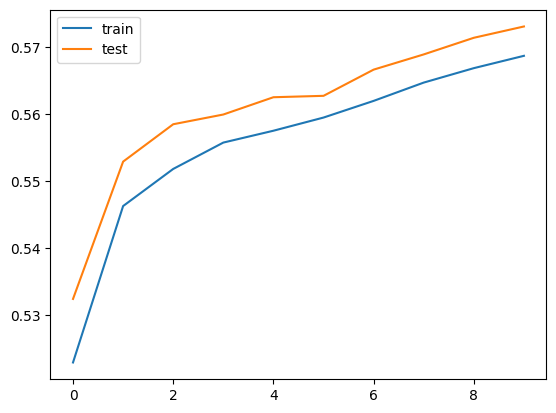

In [39]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend() 
pyplot.show()

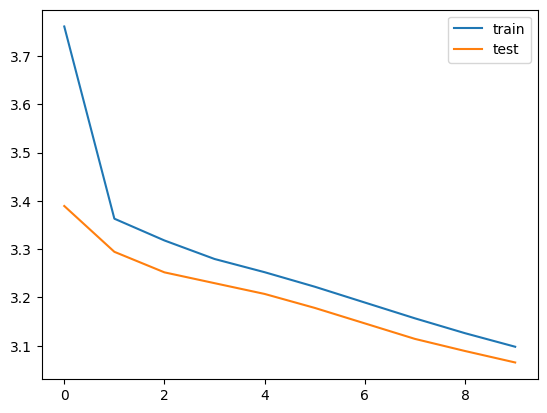

In [40]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [41]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=X_tokenizer.index_word 
from tensorflow.keras.layers import AdditiveAttention, Attention
target_word_index=y_tokenizer.word_index

In [42]:
from tensorflow.keras.layers import Input, Concatenate

encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

dec_emb2= dec_emb_layer(decoder_inputs) 

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
# attn_out_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])

decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_dense(decoder_inf_concat) 

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [43]:
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    target_seq = np.zeros((1,1))
    
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        e_h, e_c = h, c

    return decoded_sentence

In [44]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [65]:
origReview = []
origSummary = []
predSummary = []
for i in range(0,20):
    origReview.append(seq2text(X_train[i]))
    origSummary.append(seq2summary(y_train[i]))
    predSummary.append(decode_sequence(X_train[i].reshape(1,max_text_len)))

1/1 [==============================] - 0s 22ms/step


In [52]:
!pip install evaluate
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=6f66723995f74f283b4397fdb228aaea42f2419ece6ca979bbb465204f3d4886
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
Note: you may need to restart the kernel to use updated packages.


In [66]:
df = pd.DataFrame(list(zip(origReview, origSummary, predSummary)), columns =['origReview', 'origSummary', 'predSummary']) 
df.to_csv('Text Summarization Attention 15k.csv')
df

,origReview,origSummary,predSummary
0,just like you and me but her efforts have back...,liz posted pictures of daughter heidi on down ...,the year old has been in the of the year high...
1,pictured puffing away on cigarette then she sl...,from kentucky appears in new campaign for broo...,the year old has been in the of the year high...
2,developed on an industrial scale for cattle an...,set up the controversial london barton clinic ...,the year old has been in the of the year high...
3,up the wire brake cable taken from vandalised ...,bailey nearly by wire across highlight she was...,the year old has been in the of the year high...
4,chant in groups which repeats hare krishna har...,ms white son nicholas lives with monk in arizo...,the year old has been in the of the year high...
5,souvenir hat is one of the items going under t...,nearly items included in the story of collecti...,the year old has been in the of the year high...
6,by jennifer newton highway department worker w...,jim went to aid of jackie prime whose cat was ...,the year old has been in the of the year high...
7,stadium will be transformed into green and ple...,bn people expected to watch danny million of w...,the year old has been in the of the year high...
8,people with ebola and they basically pricked w...,uk health worker was with needle and flown bac...,the year old has been in the of the year high...
9,by chris parsons last updated at pm on th augu...,jeremy hill killed bear with shotgun when it w...,the year old has been in the of the year high...


In [70]:
import evaluate
rouge = evaluate.load('rouge')
print("\nReview:",origReview[0])
print("\nOriginal summary:",origSummary[0])
print("\nPredicted summary:",predSummary[0])
results = rouge.compute(predictions=predSummary[0][:145], references=origSummary[0])
print(results)
print("\n\n")


Review: just like you and me but her efforts have backfired after internet trolls stole the family snaps of heidi now from the site and published them on mocking facebook pages one of the pages was illustrated with pictures of heidi as toddler and joked about losing your virginity to retard web taunts heidi crowter who was taunted online is pictured here with her mother liz heidi is holding her laptop which shows picture of her with an offensive remark another was called your milkshake body brings all the to the yard twisted reference to popular song mrs crowter who has three other children said it makes me sad and angry that people don see it as wrong to be so hurtful they simply cannot have had the pleasure of meeting anyone with down otherwise they would realise they are warm human beings like anyone else she added there have been other cases of trolls ending up in court and like to see these trolls face the same punishment if possible targeted by heidi crowter who was mocked after

In [72]:
import evaluate
rouge = evaluate.load('rouge')
print("\nReview:",origReview[1])
print("\nOriginal summary:",origSummary[1])
print("\nPredicted summary:",predSummary[1])
results = rouge.compute(predictions=predSummary[1][:224], references=origSummary[1])
print(results)
print("\n\n")


Review: pictured puffing away on cigarette then she slaps on bangles heavy black eyeliner and headscarf to turn into michelle designer rick owens mysterious muse and wife baddie whose real name is helen ruth van winkle became an internet sensation last year after posting age defying photos online the great grandmother from kentucky now has more than followers her instagram updates usually include snaps of her smoking or performing other bad gal antics purring baddie strikes pose identifying as legendary musician kurt cobain impression the octogenarian also posed for another shot as michele the wife muse and creative mind behind fashion designer rick owens on my way to steal your man baddie became an internet sensation after she started up her controversial instagram account in april last year while no doubt eager to on baddie impressive online profile the agency which commissioned the unique shoot also added that it was her no nonsense attitude and air of confidence that really made t

In [76]:
import evaluate
rouge = evaluate.load('rouge')
for i in range(0,20):
    print("\nReview:",origReview[i])
    print("\nOriginal summary:",origSummary[i])
    print("\nPredicted summary:",predSummary[i])
#     results = rouge.compute(predictions=predSummary[i], references=origSummary[i])
#     print(results)
    print("\n\n")


Review: just like you and me but her efforts have backfired after internet trolls stole the family snaps of heidi now from the site and published them on mocking facebook pages one of the pages was illustrated with pictures of heidi as toddler and joked about losing your virginity to retard web taunts heidi crowter who was taunted online is pictured here with her mother liz heidi is holding her laptop which shows picture of her with an offensive remark another was called your milkshake body brings all the to the yard twisted reference to popular song mrs crowter who has three other children said it makes me sad and angry that people don see it as wrong to be so hurtful they simply cannot have had the pleasure of meeting anyone with down otherwise they would realise they are warm human beings like anyone else she added there have been other cases of trolls ending up in court and like to see these trolls face the same punishment if possible targeted by heidi crowter who was mocked after